# Project: Neural Network & Deep Learning (Image Classification)
### By: Krishna Kant Kaushal
### Python version used: Python 3.7.13

### ⌘ Data Description:

    Recognizing multi-digit numbers in photographs captured at street level is an important component of
    modern-day map making. A classic example of a corpus of such street level photographs is Google’s
    Street View imagery comprised of hundreds of millions of geo-located 360 degree panoramic images. 
    The ability to automatically transcribe an address number from a geo-located patch of pixels and 
    associate the transcribed number with a known street address helps pinpoint, with a high degree of
    accuracy, the location of the building it represents.
    
    More broadly, recognizing numbers in photographs is a problem of interest to the optical character 
    recognition community. While OCR on constrained domains like document processing is well studied,
    arbitrary multi-character text recognition in photographs is still highly challenging. This difficulty
    arises due to the wide variability in the visual appearance of text in the wild on account of a large
    range of fonts, colors, styles, orientations, and character arrangements. The recognition problem
    is further complicated by environmental factors such as lighting, shadows, specularities, and occlusions
    as well as by image acquisition factors such as resolution, motion, and focus blurs.
    
    In this project we will use dataset with images centred around a single digit (many of the images
    do contain some distractors at the sides). Although we are taking a sample of the data which is 
    simpler, it is more complex than MNIST because of the distractors.

### ⌘ The Street View House Numbers (SVHN) Dataset:
    
    SVHN is a real-world image dataset for developing machine learning and object recognition algorithms with
    minimal requirement on data formatting but comes from a significantly harder, unsolved, real world problem
    (recognizing digits and numbers in natural scene images). SVHN is obtained from house numbers in Google
    Street View images.

### ⌘ Objective:
    
    The objective of the project is to learn how to implement a simple image classification pipeline based
    on a deep neural network.

### ⌘ Steps and tasks:

    Understand the basic Image Classification pipeline and the data-driven approach (train/predict stages)
    1. Data fetching and understand the train/val/test splits.
    2. Implement and apply a deep neural network classifier including (feedforward neural network, RELU,
    activations) 
    3. Understand and be able to implement (vectorized) backpropagation (cost stochastic gradient descent,
    cross entropy loss, cost functions)
    4. Implement batch normalization for training the neural network
    5. Print the classification accuracy metrics

### 🥏Import the necessary libraries

In [ ]:
# for arrays and matrices
import numpy as np

# For importing data in .h5 format
import h5py

# For displaying numbers
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf

# For creating neural network layers
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense

#### Fix random seed for reproducibility

In [ ]:
seed = 1
np.random.seed(seed)

### 🥏 Loading data from h5 file

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
fileloc = '/content/gdrive/My Drive/Colab Notebooks/data/SVHN_single_grey1.h5'

In [ ]:
# Open the file
digits = h5py.File(fileloc,"r")

ls = list(digits.keys())
print("Datasets are: ",ls)

Datasets are:  ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


Getting train, validation and test splits:

In [ ]:
# Test set of data
X_test = np.array(digits.get("X_test"))
print("Test set features shape:\n",X_test.shape)

y_test = np.array(digits.get("y_test"))
print("\nTest set target shape:\n",y_test.shape)

Test set features shape:
 (18000, 32, 32)

Test set target shape:
 (18000,)


In [ ]:
# Train set of data
X_train = np.array(digits.get("X_train"))
print("\nTrain set features shape:\n",X_train.shape)

y_train = np.array(digits.get("y_train"))
print("\nTrain set target shape:\n",y_train.shape)


Train set features shape:
 (42000, 32, 32)

Train set target shape:
 (42000,)


In [ ]:
# Validation set of data
X_val = np.array(digits.get("X_val"))
print("\nValidation set features shape:\n",X_val.shape)

y_val = np.array(digits.get("y_val"))
print("\nValidation set target shape:\n",y_val.shape)

# Close this file
digits.close()


Validation set features shape:
 (60000, 32, 32)

Validation set target shape:
 (60000,)


### 🥏 Flatten the images for Keras

In [ ]:
X_test = X_test.reshape(18000,1024)
print("\nTest set features shape after flattening the features values:\n",X_test.shape)

X_train = X_train.reshape(42000,1024)
print("\nTrain set features shape after flattening the features values:\n",X_train.shape)

X_val = X_val.reshape(60000,1024)
print("\nValidation set features shape after flattening the features values:\n",X_val.shape)


Test set features shape after flattening the features values:
 (18000, 1024)

Train set features shape after flattening the features values:
 (42000, 1024)

Validation set features shape after flattening the features values:
 (60000, 1024)


### 🥏 Normalize the inputs for X_train, X_test and X_val

In [ ]:
# # normalize inputs from 0-255 to 0-1
X_test = X_test / 255.0
X_train = X_train / 255.0
X_val = X_val / 255.0

### 🥏 Convert the class matrices Y_train, Y_test and Y_val into one hot vectors

In [ ]:
num_classes = 10
y_train = tf.keras.utils.to_categorical(y_train, num_classes=num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=num_classes)
y_val = tf.keras.utils.to_categorical(y_val, num_classes=num_classes)
y_val.shape

(60000, 10)

### 🥏 Print the train, test and val shapes

In [ ]:
# Test set of data
print("Test set features shape:\n",X_test.shape)
print("\nTest set target shape:\n",y_test.shape)

# Train set of data
print("\nTrain set features shape:\n",X_train.shape)
print("\nTrain set target shape:\n",y_train.shape)

# Validation set of data
print("\nValidation set features shape:\n",X_val.shape)
print("\nValidation set target shape:\n",y_val.shape)

Test set features shape:
 (18000, 1024)

Test set target shape:
 (18000, 10)

Train set features shape:
 (42000, 1024)

Train set target shape:
 (42000, 10)

Validation set features shape:
 (60000, 1024)

Validation set target shape:
 (60000, 10)


### 🥏 Visualize the first 10 images in X_train and the corresponding Y_train labels

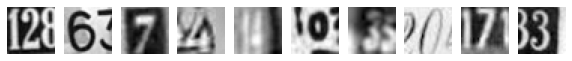

Label for each of the above images espectively:
 ['2', '6', '7', '4', '4', '0', '3', '0', '7', '3']


In [ ]:
# visualizing the first 10 images in the dataset and their labels
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 1))
labels = []
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i].reshape(32, 32), cmap="gray")
    plt.axis("off")
    labels += str(np.argmax((y_train[i])))
plt.show()
print('Label for each of the above images espectively:\n',labels)

### 🥏 In the train and test loop, define the hyperparameters for the model

Below combinations of hyper parameter values were tried to get the best accuracy.

Changing Epoch value:

learn_rate = 0.1, momentum = 0.8, epochs= 30, batch_size = 200
> Accuracy: 91.61%
------------------
learn_rate = 0.1, momentum = 0.8, epochs= 20, batch_size = 200
> Accuracy: 89.59%
------------------
learn_rate = 0.1, momentum = 0.8, epochs= 40, batch_size = 200
> Accuracy: 92.81%
------------------
learn_rate = 0.1, momentum = 0.8, epochs= 50, batch_size = 200
> Accuracy: 93.34%
------------------


Changing batch_size values:

learn_rate = 0.1, momentum = 0.8, epochs = 30, batch_size = 50
> Accuracy: 91.26%
------------------
learn_rate = 0.1, momentum = 0.8, epochs = 30, batch_size = 100
> Accuracy: 91.91%
------------------
learn_rate = 0.1, momentum = 0.8, epochs = 30, batch_size = 200
> Accuracy: 91.60%
------------------
learn_rate = 0.1, momentum = 0.8, epochs = 30, batch_size = 300
> Accuracy: 85.08%
------------------


Changing learn_rate values:

learn_rate = 0.01, momentum = 0.8, epochs = 50, batch_size = 100
> Accuracy: 91.99%
------------------
learn_rate = 0.01, momentum = 0.8, epochs = 50, batch_size = 200
> Accuracy: 88.73%
------------------
learn_rate = 0.2, momentum = 0.8, epochs = 50, batch_size = 100
> Accuracy: 93.07%
------------------
learn_rate = 0.2, momentum = 0.8, epochs = 50, batch_size = 200
> Accuracy: 93.34%
------------------
learn_rate = 0.005, momentum = 0.8, epochs = 50, batch_size = 200
> Accuracy: 92.93%
------------------

Changing momentum values:

learn_rate = 0.1, momentum = 0.8, epochs= 50, batch_size = 200
> Accuracy: 93.34%
------------------
learn_rate = 0.1, momentum = 0.7, epochs= 50, batch_size = 200
> Accuracy: 92.22%
------------------
learn_rate = 0.1, momentum = 0.9, epochs= 50, batch_size = 200
> Accuracy: 93.45%
------------------
learn_rate = 0.1, momentum = 0.95, epochs= 50, batch_size = 200
> Accuracy: 92.73%
------------------
learn_rate = 0.1, momentum = 0.85, epochs= 50, batch_size = 200
> Accuracy: 93.71%
This is the best hyperparameter set that gave the best accuracy.

In [ ]:
learn_rate = 0.1
epochs = 50
decay_rate = learn_rate / epochs
momentum = 0.85

### 🥏 Define the optimizers to be used in this model

In [ ]:
def optimizerSGD():
  sgd = tf.keras.optimizers.SGD(learning_rate = learn_rate, momentum=momentum, decay=decay_rate, nesterov=False)
  return sgd

optimizerSGD = optimizerSGD()

In [ ]:
def optimizerAdam():
  adam = tf.keras.optimizers.Adam(learning_rate = 1e-3)
  return adam

optimizerAdam = optimizerAdam()

### 🥏 Create a Sequential model in Keras with input layer with the correct input shape, Hidden Layers, Output Layers and the activation functions

In [ ]:
input_dim = X_train.shape[1]

def seq_model(learn_rate, optimizerType):
  lr_model = tf.keras.models.Sequential()

  lr_model.add(BatchNormalization(input_shape = (input_dim,)))  ### Batch_Norm Layer
  lr_model.add(Dense(256, kernel_initializer='uniform', activation=tf.nn.relu))
  lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
  lr_model.add(Dense(64, kernel_initializer='uniform', activation=tf.nn.relu))
  lr_model.add(Dense(32, kernel_initializer='uniform', activation=tf.nn.relu))
  lr_model.add(Dense(num_classes, activation=tf.nn.softmax))
  
  # Compile the model
  lr_model.compile(loss='categorical_crossentropy', optimizer=optimizerType, metrics=['acc']) ### Loss function = Categorical cross entropy
  return lr_model

In [ ]:
model = seq_model(learn_rate, optimizerSGD)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (BatchN  (None, 1024)             4096      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 64)                16448     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 10)                330       
                                                        

### 🥏 Fitting the model

In [ ]:
model.fit(X_train,y_train,          
          validation_data=(X_val,y_val),
          epochs = 50,
          batch_size = 200)

Epoch 1/50
210/210 [==============================] - 5s 22ms/step - loss: 2.2968 - acc: 0.1096 - val_loss: 2.2384 - val_acc: 0.1629
Epoch 2/50
210/210 [==============================] - 4s 20ms/step - loss: 1.7140 - acc: 0.3677 - val_loss: 1.2786 - val_acc: 0.5706
Epoch 3/50
210/210 [==============================] - 4s 20ms/step - loss: 1.0887 - acc: 0.6367 - val_loss: 0.9050 - val_acc: 0.7071
Epoch 4/50
210/210 [==============================] - 4s 21ms/step - loss: 0.8306 - acc: 0.7362 - val_loss: 0.7060 - val_acc: 0.7793
Epoch 5/50
210/210 [==============================] - 4s 21ms/step - loss: 0.7064 - acc: 0.7800 - val_loss: 0.6556 - val_acc: 0.7947
Epoch 6/50
210/210 [==============================] - 4s 20ms/step - loss: 0.6314 - acc: 0.8034 - val_loss: 0.6023 - val_acc: 0.8135
Epoch 7/50
210/210 [==============================] - 4s 21ms/step - loss: 0.5734 - acc: 0.8205 - val_loss: 0.5377 - val_acc: 0.8345
Epoch 8/50
210/210 [==============================] - 5s 25ms/step - 

🥏 Model Accuracy using validation dataset:

In [ ]:
score_val = model.evaluate(X_val,y_val, verbose=0)

print('Accuracy: %.2f%%' % (score_val[1]*100))
print("Error   :  %.2f%%" % (100-score_val[1]*100))

Accuracy: 93.67%
Error   :  6.33%


🥏 Model Accuracy using test dataset:

In [ ]:
score_test = model.evaluate(X_test,y_test, verbose=0)

print('Accuracy: %.2f%%' % (score_test[1]*100))
print("Error   :  %.2f%%" % (100-score_test[1]*100))

Accuracy: 85.84%
Error   :  14.16%


While model evaluation looks good, lets actually get few prediction from model using test dataset and compare them with actual values.

In [ ]:
pred = model.predict(X_test) 
pred = np.argmax(pred, axis = 1)[:25] 
label = np.argmax(y_test,axis = 1)[:25] 

In [ ]:
print(pred, '<-- Predicted digits.') 
print(label, '<-- Actual digits.')

[2 7 2 9 0 9 1 8 1 4 8 2 1 4 3 5 8 6 5 5 0 6 5 8 3] <-- Predicted digits.
[1 7 2 9 0 9 1 8 4 4 8 9 1 4 3 5 8 6 5 5 0 6 5 8 3] <-- Actual digits.


We can see here that 22 out of 25 digits are predicted correctly here which is 88% accurate.

### 🥏 Conclusion:

Deep Learning model, that solves a real world problem (recognizing digits and numbers in natural scene images) with quite good accuracy was created from a real-world image dataset. The model accuracy could be improved by fine tuning the hyperparameter.